# MDI220
# Statistiques

# Mini-project 

Ce mini-projet est pour le cours Statistiques MDI220.

Vous devez remplir ce notebook et le uploader sur eCampus, **avec les figures**. S'il vous plaît, assurez-vous que le notebook s'execute **sans erreurs**.

Vous pouvez accomplir ce projet en français ou en anglais (votre préférence).

Vous pouvez travailler en equipe, mais le notebook final, compris le texte et le code, doit être **votre propre**. Plagiat entre les étudiants est strictement interdit.

S'il vous plaît, donner **la réponse concise** et **le code concis**, avec des commentaires ou approprié.

(Re)nommer le fichier de ce notebook dans le format suivant : "NOM_Prenom_projet_MDI220.ipynb".

## VERNINAS Hippolyte

## Imports

S'il vous plaît, **n'importez pas** d'autres librairies.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from scipy.stats import norm, chi2, gaussian_kde

In [7]:
import seaborn as sns

## Données

Nous considérons les données de **consomation quotidienne d'electricité** (en MW) en France dans le période 2013-2023. Les données sont accessibles sur **eCampus**.

Les informationnes détaillées sur les données sont accessible [ici](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [8]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [9]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [10]:
regions = list(df.region.unique())

In [11]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [12]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [13]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int32

In [14]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

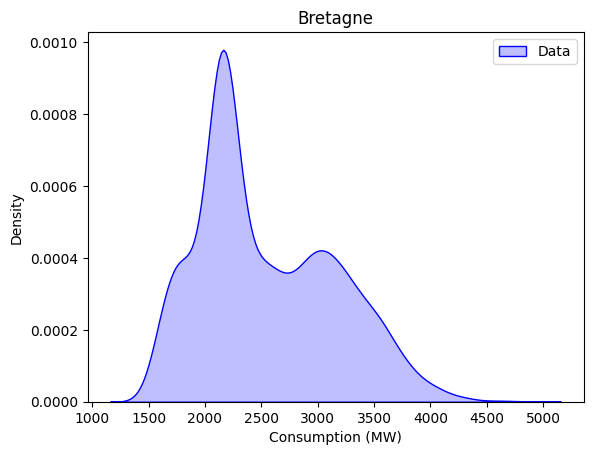

In [15]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## A. Estimation ponctuelle

Dans l'entité du projet, consomation quotidienne d'electricité est supposée i.i.d., avec la distribution gaussienne.

Nous allons utiliser les estimateurs suivants pour la moyenne et la variance, pour $n$ observations $x_1,\ldots,x_n$ :
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
L'estimateur correspondant de l'écart-type est :
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Considérons la region Bretagne. 

1. Montrez que les estimateur pour la moyenne et la variance sont sans biais.

Votre réponse :

2. Donnez les valeurs obtenues pour la moyen et pour la variance en utilisant ces estimateurs.

In [30]:
moyenne = df_region.consumption.sum()/df_region.consumption.count()
print(f"moyenne: {moyenne}")
variance = sum([(x-moyenne)**2 for x in df_region.consumption])/(df_region.consumption.count()-1)
print(f"variance: {variance}")


moyenne: 2546.536155666579
variance: 604.9429842099305


3. Générez les nouvelles données en utilisant le modèle gaussien avec ces estimateurs, et avec le même nombre d'observations.

4. Tracez l'estimateur à noyau de la densité  *kde* (kernel density estimate) des données réelles et des données générées sur la même figure.

5. Répétez la même procédure pour les jours d'hiver (du 22/12 au 21/03), après avoir mis à jour le modèle.

6. Dans quel des cas l'hypothèse gaussienne est plus appropriée ?

## B. Goodness of fit

On souhaite confirmer et quantifier l'observation de la partie A.

Nous proposons la mesure de dissimilarité suivante, qui se base sur deux fonctionnes de répartitions $f$ et $g$:
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Montrez que $d(f,g) \in [0,1]$, avec $d(f,g)=0$ si et seulement si $f=g$ presque partout (pour la mesure de Lebesgue) et $d(f,g)=1$ si et seulement si $f$ et $g$ possèdent des supports disjoints.

Votre réponse :

2. Pour la région Bretagne, calculez la dissimilarité entre le *kde* des données réelles et de la densité du modèle gaussien.

3. Répétez la même procedure pour la région Bretagne en hiver et verifiez votre conclusion de la partie A.

4. Répétez la même procedure pour toutes régions. Présentez le résultat dans un seul dataframe.

5. Quelle région a le meilleur *fit* avel le modèle gaussien en hiver ?

6. Pour ces région et saison, tracez le *kde* des données réelles et le *kde* des données générées sur le même graphique.

## C. Statistique bayésienne

On souhaite inclure la connaissance a priori sur l'estimation, en utilisant la statistique bayésienne.

Considérez la région Bretagne en hiver. On se focalise sur la moyenne $\mu$, en supposant que l'écart-type est connu et egal à $\sigma=400$MW. Supposons la loi a priori sur $\mu$ avec moyenne $\mu_0=3500$MW et l'écart-type $\sigma_0=500$MW.

1. Donnez la loi a posteriori pour $\mu$, en utilisant les paramètres $\sigma$, $\mu_0$, $\sigma_0$ et $n$ observations $x_1,\ldots,x_n$.

Votre réponse :

2. Donnez les paramètres de la loi a posteriori obtenue pour chaque année de 2013 au 2023, considérée independament, dans un seul dataframe.

3. Tracez la densité de la loi a posteriori en 2023 et le *kde* des données réelles en 2023, sur le même graphique.

4. Discutez les résultats, en les comparant avec ceux obtenus dans la partie A.

Votre réponse :

## D. Test d'hypothèse

Considérez la région Bretagne. Alors que l'écart-type en hiver est egal à 400MW, vous shouaitez tester l'hypothèse que c'était 500MW en 2023. La moyenne est supposée connue et egal à 3200MW.

1. Proposez la statisque du test pour un niveau $\alpha$.

Votre réponse :

2. Donnez le résultat de ce test pour $\alpha=1\%$.

## E. Test d'indépendence

Considérez la consomation d'electicité en Bretagne et en Provence-Alpes-Côte d'Azur en hiver.

1. Visualisez la loi jointe de la consomation dans ces 2 régions en utilisant la librarie **seaborn**.

2. Est-ce que vous pensez que la consomation dans ces 2 régions est indépendante ?

Votre réponse :

3. Proposez le test du Chi-2 pour l'indépendance de la consomation dans ces deux régions pour un niveau $\alpha$. 

Votre réponse :

4. Donnez le résultat de ce test pour $\alpha=1\%$.

## F. Intervalle de confiance

Considérez la région Bretagne en hiver.

1. Donnez l'intervalle de confiance pour un niveau $\alpha=95\%$ pour la moyenne consomation d'electricité.

2. Donnez le résultat du test de Student pour un niveau $5\%$ pour l'hypothèse null que la moyenne consomation en 2023 est egal à 3100MW.